<a href="https://colab.research.google.com/github/lademir/TP-Final-iNF420/blob/main/TP_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicao de quantidade de suicidios

## Parametros


1.   País
2.   



## Sumário
> 1. Definição
> 2. Pre-processamento
> 3. Breve análise dos dados obtidos
> 4. implementação dos modelos
> 5. Resultados


In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns

## Definicao da classe e funcoes para organizar o modelo

In [3]:
# Retira as linhas com dados inconsistentes
def dropNanFromCsv(dataset):
  notNullDataset = dataset.dropna()
  return notNullDataset

# Verifica a existencia de dados repetidos
def hasDuplicated(dataset):
  dup = dataset.duplicated()
  return np.unique(dup)

In [4]:
class SuicideTendency:
  def __init__(self):
    self.suicide_dataset = pd.read_csv("/content/drive/MyDrive/Faculdade/2022.1/INF 420/Trabalhos/Trabalho final/base/who_suicide_statistics.csv")
    self.alcohol_dataset = pd.read_csv("/content/drive/MyDrive/Faculdade/2022.1/INF 420/Trabalhos/Trabalho final/base/student-mat.csv")
    
    self.countries = self.suicide_dataset["country"].unique()
    self.ages = self.suicide_dataset["age"].unique()
    self.sex = self.suicide_dataset["sex"].unique()

  # Realiza o pre-processamento dos dados
  def preProcessData(self):
    print("Iniciando pre-processamento dos dados")
    self.suicide_dataset = dropNanFromCsv(self.suicide_dataset)

    le1 = preprocessing.LabelEncoder()
    le2 = preprocessing.LabelEncoder()
    le3 = preprocessing.LabelEncoder()
    le_sex=le1.fit(self.suicide_dataset.sex)
    le_age=le2.fit(self.suicide_dataset.age)
    le_country=le3.fit(self.suicide_dataset.country)

    # Atualiza os valores das celulas com valores numericos
    self.suicide_dataset.sex = le_sex.transform(self.suicide_dataset.sex) # female:0 , male:1
    self.suicide_dataset.age = le_age.transform(self.suicide_dataset.age) # 15-24: 0, 25-34:1, 35-54:2 , 5-14:3, 55-74:4, 75+:5
    self.suicide_dataset.country=le_country.transform(self.suicide_dataset.country)

    self.setSpecificAgeOnsuicide_dataset()

  def countsuicide_dataset(self):
    self.suicide_dataset.count()

  # @params: num: quantidade de linhas a partir da linha 0 que vao ser printadas
  def head(self, num = 5):
    print(self.suicide_dataset.head(num))

  def ageUnique(self):
    uniqueAge = self.suicide_dataset.age.unique()
    print(uniqueAge)

  def showCountries(self):
    print("Quantidade de paises: " + len(self.countries))
    print(self.countries)

  def setSpecificAgeOnsuicide_dataset(self):
    ANO_DA_PESQUISA = 2017
    self.suicide_dataset["year_age"] = ANO_DA_PESQUISA - self.suicide_dataset["year"]

  def plotHeatmap(self):
    fig, ax = plt.subplots(figsize=(15,12))
    ax = sns.heatmap(self.suicide_dataset.corr(), annot=True, vmin=-1, vmax=1, cmap="YlGnBu")

  # @params: coluna objetivo, array de coluna de features
  # @return: y_train, X_train
  def dataForModel(self, objective, features):
    y = self.suicide_dataset[objective]
    X = self.suicide_dataset[features]

    return [X, y]

  def groupBy(self, group):
    return self.suicide_dataset.groupby([group])

    

In [5]:
st = SuicideTendency()

st.preProcessData()
st.head(100)


Iniciando pre-processamento dos dados
     country  year  sex  age  suicides_no  population  year_age
24         0  1987    0    0         14.0    289700.0        30
25         0  1987    0    1          4.0    257200.0        30
26         0  1987    0    2          6.0    278800.0        30
27         0  1987    0    3          0.0    311000.0        30
28         0  1987    0    4          0.0    144600.0        30
..       ...   ...  ...  ...          ...         ...       ...
143        0  1996    1    5          2.0     25400.0        21
144        0  1997    0    0         21.0    294000.0        20
145        0  1997    0    1         16.0    273900.0        20
146        0  1997    0    2          7.0    370100.0        20
147        0  1997    0    3          6.0    361800.0        20

[100 rows x 7 columns]


# Armazenando o dataset

In [6]:
df = pd.read_csv("/content/drive/MyDrive/Faculdade/2022.1/INF 420/Trabalhos/Trabalho final/base/suicide_rate.csv")
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [7]:
df.shape

(27820, 12)

In [8]:
df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [9]:
df.columns = ['country', 'year', 'gender', 'age_group', 'suicide_count', 'population', 'suicide_rate', 'country-year', 'HDI for year',
                'gdp_for_year', 'gdp_per_capita', 'generation']
df.columns

Index(['country', 'year', 'gender', 'age_group', 'suicide_count', 'population',
       'suicide_rate', 'country-year', 'HDI for year', 'gdp_for_year',
       'gdp_per_capita', 'generation'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         27820 non-null  object 
 1   year            27820 non-null  int64  
 2   gender          27820 non-null  object 
 3   age_group       27820 non-null  object 
 4   suicide_count   27820 non-null  int64  
 5   population      27820 non-null  int64  
 6   suicide_rate    27820 non-null  float64
 7   country-year    27820 non-null  object 
 8   HDI for year    8364 non-null   float64
 9   gdp_for_year    27820 non-null  object 
 10  gdp_per_capita  27820 non-null  int64  
 11  generation      27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [11]:
# Dataset depois das mudancas de nome

df.head()

,country,year,gender,age_group,suicide_count,population,suicide_rate,country-year,HDI for year,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [12]:
print("Quantidade de dados com base no grupo: ")

print("\nGrupo de idade: ")
print(df.age_group.value_counts())

print("\nSexo: ")
print(df.gender.value_counts())

print("\nGeracao: ")
df.generation.value_counts()

Quantidade de dados com base no grupo: 

Grupo de idade: 
15-24 years    4642
35-54 years    4642
75+ years      4642
25-34 years    4642
55-74 years    4642
5-14 years     4610
Name: age_group, dtype: int64

Sexo: 
male      13910
female    13910
Name: gender, dtype: int64

Geracao: 


Generation X       6408
Silent             6364
Millenials         5844
Boomers            4990
G.I. Generation    2744
Generation Z       1470
Name: generation, dtype: int64

In [13]:
countries = df["country"].unique()
print("Quantidade de paises: ", len(countries))
countries

Quantidade de paises:  101


array(['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Barbados', 'Belarus', 'Belgium', 'Belize',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cabo Verde',
       'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba',
       'Cyprus', 'Czech Republic', 'Denmark', 'Dominica', 'Ecuador',
       'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France', 'Georgia',
       'Germany', 'Greece', 'Grenada', 'Guatemala', 'Guyana', 'Hungary',
       'Iceland', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan',
       'Kazakhstan', 'Kiribati', 'Kuwait', 'Kyrgyzstan', 'Latvia',
       'Lithuania', 'Luxembourg', 'Macau', 'Maldives', 'Malta',
       'Mauritius', 'Mexico', 'Mongolia', 'Montenegro', 'Netherlands',
       'New Zealand', 'Nicaragua', 'Norway', 'Oman', 'Panama', 'Paraguay',
       'Philippines', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar',
       'Republic of Korea', 'Romania', '

# Visualizando o dataset

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f46dab5af10>,
      dtype=object)

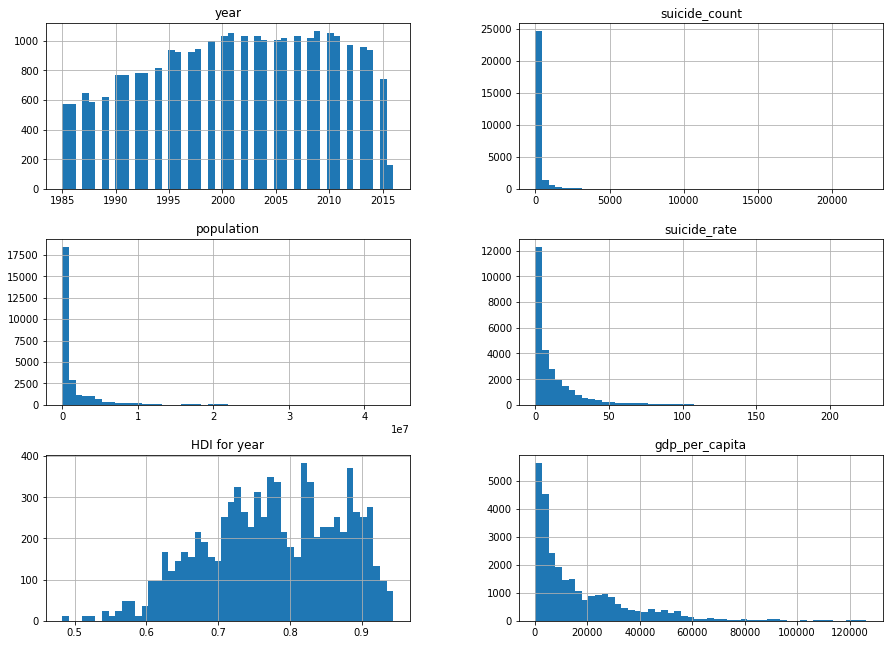

In [14]:
df.hist(bins = 50, figsize=(15,11))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


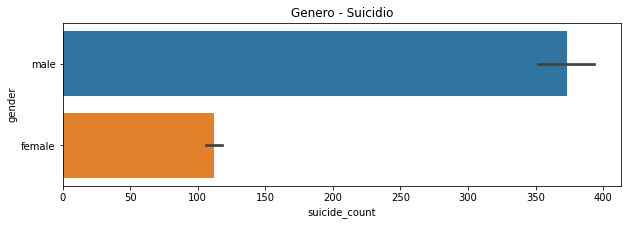

In [15]:
# Genero e suicidio

plt.figure(figsize=(10,3))
sns.barplot(df.suicide_count, df.gender)
plt.title("Genero - Suicidio")
plt.show()

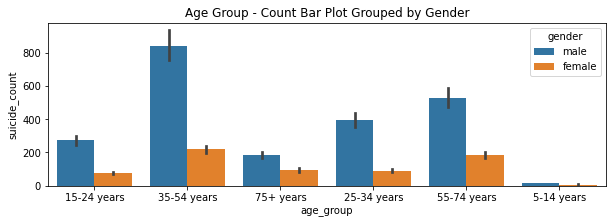

In [16]:
# Baseado no grupo de idade 

plt.figure(figsize=(10,3))
sns.barplot(x = "age_group", y = "suicide_count", hue = "gender", data = df)
plt.title("Age Group - Count Bar Plot Grouped by Gender")
plt.show()

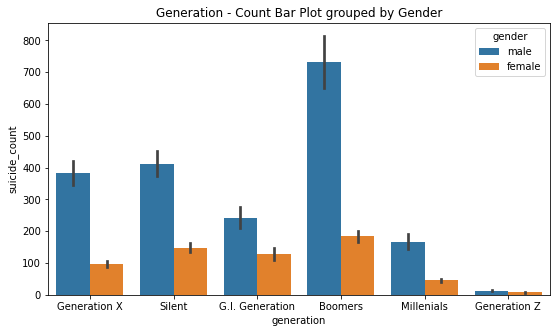

In [17]:
#Generation - Count Bar Plot grouped by Gender

plt.figure(figsize=(9,5))
sns.barplot(x = "generation", y = "suicide_count", hue = "gender", data = df)
plt.title('Generation - Count Bar Plot grouped by Gender')
plt.show()

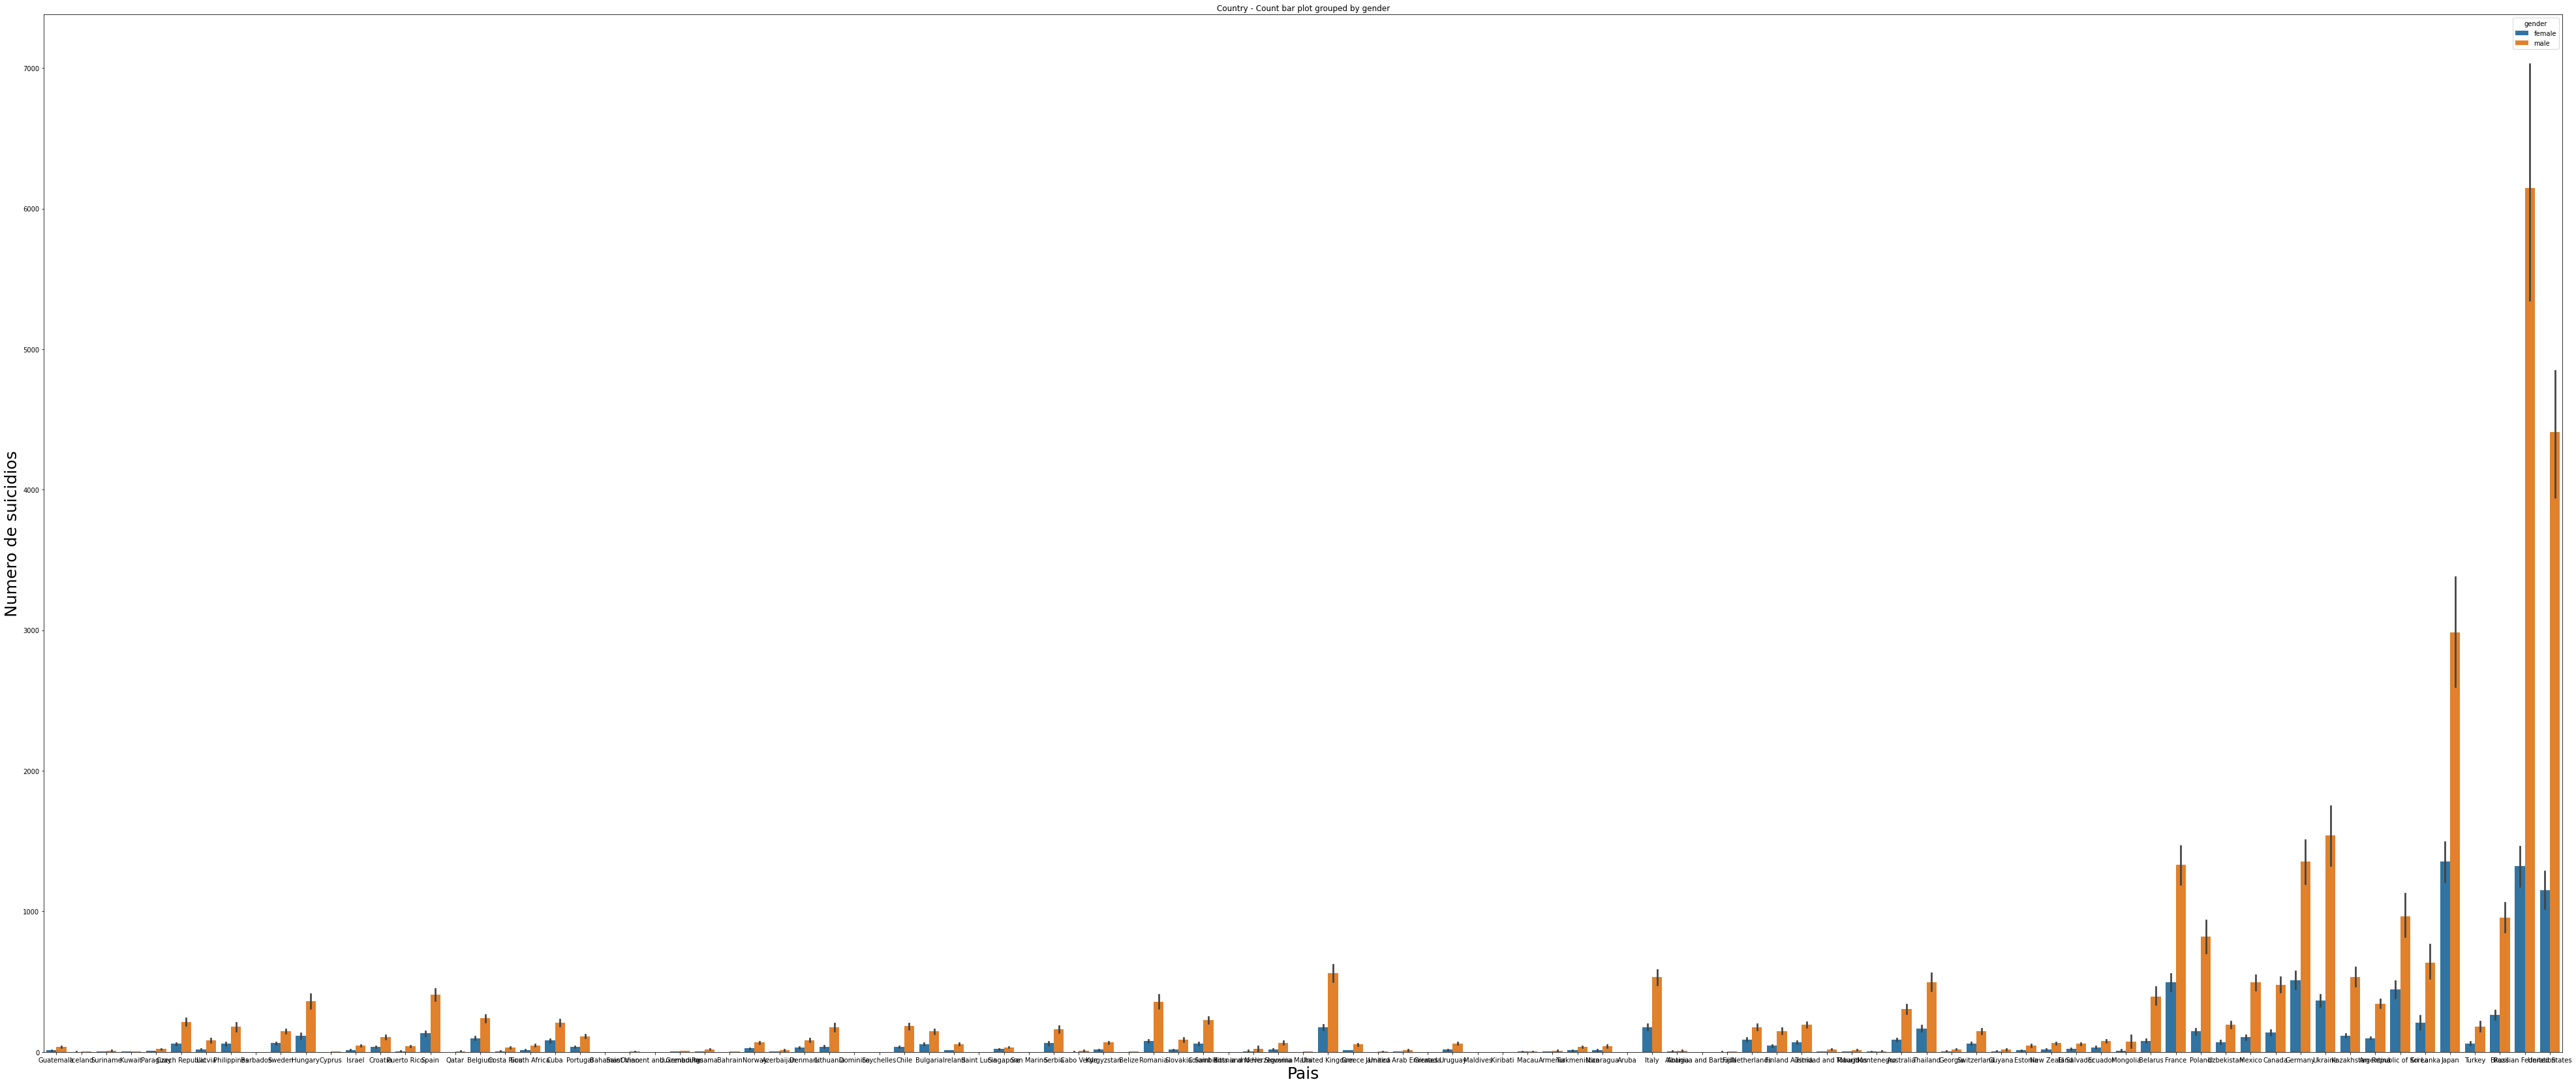

In [18]:
# Suicides by gender and country

plt.figure(figsize=(55,23))
sns.barplot(x = "country", y = "suicide_count", hue = "gender", data = df.sort_values('suicide_count'))
plt.xlabel("Pais", size=25)
plt.ylabel("Numero de suicidios", size=25)
plt.tight_layout()
plt.title("Country - Count bar plot grouped by gender")
plt.show()

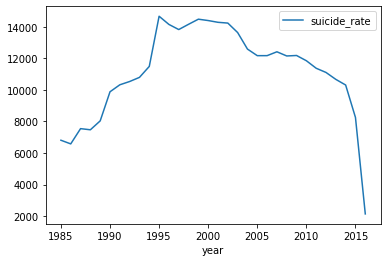

In [19]:
#Line plpot of year and suicide_rate

df[['year','suicide_rate']].groupby(['year']).sum().plot()

# Preprocessing data

In [20]:
# Retira as linhas com dados inconsistentes
def dropNanFromCsv(dataset):
  notNullDataset = dataset.dropna()
  return notNullDataset

  
def groupBy(self, group):
  return self.suicide_dataset.groupby([group])

In [21]:
# Analizando quantos dos dados sao inconsistentes (null)

df.isnull().sum()

country               0
year                  0
gender                0
age_group             0
suicide_count         0
population            0
suicide_rate          0
country-year          0
HDI for year      19456
gdp_for_year          0
gdp_per_capita        0
generation            0
dtype: int64

In [22]:
# Como a maioria das linhas possuem HDI_for_year null, vamos remove-la do dataframe

df = df.drop(["HDI for year"], axis=1)

df.head()



,country,year,gender,age_group,suicide_count,population,suicide_rate,country-year,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,"2,156,624,900",796,Boomers


In [23]:
# a coluna countr-year eh apenas uma juncao do pais com o ano, nao sera util para nosso estudo, entao vamos remove-la do dataframe

df = df.drop(["country-year"], axis=1)

df.head()

,country,year,gender,age_group,suicide_count,population,suicide_rate,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,"2,156,624,900",796,Boomers


In [24]:
# Agora temos nenhuma linha com dados inconsistentes

df.isnull().sum()

country           0
year              0
gender            0
age_group         0
suicide_count     0
population        0
suicide_rate      0
gdp_for_year      0
gdp_per_capita    0
generation        0
dtype: int64

## Transformando as celulas de dados categoricos em numeros (label enconding)

In [25]:
# copiando o dataset antes de fazer o encoder para fins de comparacao

clean_dataset = df.copy()
clean_dataset

,country,year,gender,age_group,suicide_count,population,suicide_rate,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,"63,067,077,179",2309,Generation Z


In [26]:

from sklearn.preprocessing import LabelEncoder
categorical = ['country', 'year','age_group', 'gender', 'generation']
le = LabelEncoder()

for column in categorical:
    df[column] = le.fit_transform(df[column])

df.head()

,country,year,gender,age_group,suicide_count,population,suicide_rate,gdp_for_year,gdp_per_capita,generation
0,0,2,1,0,21,312900,6.71,"2,156,624,900",796,2
1,0,2,1,2,16,308000,5.19,"2,156,624,900",796,5
2,0,2,0,0,14,289700,4.83,"2,156,624,900",796,2
3,0,2,1,5,1,21800,4.59,"2,156,624,900",796,1
4,0,2,1,1,9,274300,3.28,"2,156,624,900",796,0


In [27]:
# Convertendo a columa de string para float

df['gdp_for_year'] = df['gdp_for_year'].str.replace(',','').astype(float)


In [28]:
# Scaling the numerical data columns with RobustScalar

# numerical = ['population', 'suicide_rate', 
#               'gdp_for_year','gdp_per_capita', 'suicide_count']

# from sklearn.preprocessing import RobustScaler

# rc = RobustScaler()
# df[numerical] = rc.fit_transform(df[numerical])

# df.head()

# Implementacao do modelo

## Separando o dataframe em teste e validacao

In [29]:
y = df["suicide_count"]
X = df.drop(["suicide_rate", "gdp_for_year", "gdp_per_capita", "suicide_count", "generation"], axis=1)


print(y.shape)
print(X.shape)

(27820,)
(27820, 5)


In [30]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(20865, 5)
(20865,)
(6955, 5)
(6955,)


## Dados de comparacao entre os metodos

In [31]:
# Creating holders to store the model performance results
ML_Model = []
acc_train_res = []
acc_test_res = []
rmse_train_res = []
rmse_test_res = []
r2score_res = []
maxError_res = []

#function to call for storing the results
def storeResults(model, acc_train, acc_test, rmse_train, rmse_test, r2, max):
    ML_Model.append(model)
    acc_train_res.append(round(acc_train, 3))
    acc_test_res.append(round(acc_test, 3))
    rmse_train_res.append(round(rmse_train, 3))
    rmse_test_res.append(round(rmse_test, 3))
    r2score_res.append(round(r2))
    maxError_res.append(round(max))

## Random Forest Regressor

### Implementando o modelo

In [32]:
# RANDOM FOREST REGRESSOR

from sklearn.ensemble import RandomForestRegressor

# instantiate the model
forest = RandomForestRegressor(max_depth=20)

# fit the model 
forest.fit(x_train, y_train)

RandomForestRegressor(max_depth=20)

In [33]:
#predicting the target value from the model for the samples
y_test_forest = forest.predict(x_test)
y_train_forest = forest.predict(x_train)

### Metricas

In [34]:
from sklearn.metrics import mean_squared_error

#computing the accuracy of the model performance
acc_train_forest = forest.score(x_train, y_train) * 100
acc_test_forest = forest.score(x_test, y_test) * 100

#computing root mean squared error (RMSE)
rmse_train_forest = np.sqrt(mean_squared_error(y_train, y_train_forest))
rmse_test_forest = np.sqrt(mean_squared_error(y_test, y_test_forest))

print("Random Forest: Acuracia de treino: {:.3f}%".format(acc_train_forest))
print("Random Forest: Acuracia de validacao: {:.3f}%".format(acc_test_forest))

print("\nErro medio de treino: ", rmse_train_forest)
print("Erro medio de validacao: ", rmse_test_forest)

Random Forest: Acuracia de treino: 99.742%
Random Forest: Acuracia de validacao: 99.036%

Erro medio de treino:  46.23151847611363
Erro medio de validacao:  86.08116624725


In [35]:
from sklearn.metrics import r2_score

r2score = r2_score(y_test, y_test_forest) * 100

print("Random Forest R2 score: {:.3f}%".format(r2score))

Random Forest R2 score: 99.036%


In [36]:
from sklearn.metrics import max_error

maxError = max_error(y_test, y_test_forest)

print("Random Forest erro maximo: {:.3f}".format(maxError))

Random Forest erro maximo: 2342.330


### Problemas de overfitting?

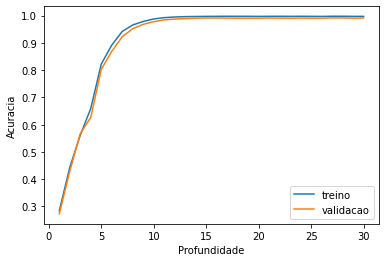

In [37]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 30
depth = range(1, 31)
for n in depth:
    # fit the model
    tree = RandomForestRegressor(max_depth=n)
    tree.fit(x_train, y_train)
    # record training set accuracy
    training_accuracy.append(tree.score(x_train, y_train))
    # record generalization accuracy
    test_accuracy.append(tree.score(x_test, y_test))

#plotting the training & testing accuracy for max_depth from 1 to 30
plt.plot(depth, training_accuracy, label="treino")
plt.plot(depth, test_accuracy, label="validacao")
plt.ylabel("Acuracia")  
plt.xlabel("Profundidade")
plt.legend()

In [38]:
# instantiate the model
forest = RandomForestRegressor(max_depth=7)

# fit the model 
forest.fit(x_train, y_train)

RandomForestRegressor(max_depth=7)

In [55]:
#predicting the target value from the model for the samples
y_test_forest = forest.predict(x_test)
y_train_forest = forest.predict(x_train)

In [56]:
acc_train_forest = forest.score(x_train, y_train) * 100
acc_test_forest = forest.score(x_test, y_test) * 100

#computing root mean squared error (RMSE)
rmse_train_forest = np.sqrt(mean_squared_error(y_train, y_train_forest))
rmse_test_forest = np.sqrt(mean_squared_error(y_test, y_test_forest))

print("Random Forest: Acuracia de treino: {:.3f}%".format(acc_train_forest))
print("Random Forest: Acuracia de validacao: {:.3f}%".format(acc_test_forest))

print("\nErro medio de treino: ", rmse_train_forest)
print("Erro medio de validacao: ", rmse_test_forest)

from sklearn.metrics import r2_score

r2score = r2_score(y_test, y_test_forest) * 100

print("\nRandom Forest R2 score: {:.3f}%".format(r2score))

from sklearn.metrics import max_error

maxError = max_error(y_test, y_test_forest)

print("\nRandom Forest erro maximo: {:.3f}".format(maxError))

Random Forest: Acuracia de treino: 94.166%
Random Forest: Acuracia de validacao: 92.234%

Erro medio de treino:  219.86462619280388
Erro medio de validacao:  244.34024246075862

Random Forest R2 score: 92.234%

Random Forest erro maximo: 4399.361


In [57]:
# Armazenando para comparacao

storeResults("RandomForest", acc_test=acc_test_forest, acc_train=acc_train_forest, rmse_train=rmse_train_forest, rmse_test=rmse_test_forest, r2=r2score, max=maxError)

### Predicao de uma amostra de tamanho 1

In [41]:
# country, year, gender, age_group, suicide_count, population, gdp_for_year, gdp_per_capta, generation

# gdp = PIB


# male = 1 | female = 0

# 0: 15-24
# 1: 25-34
# 2: 35-54
# 3: 5-14
# 4: 55-74
# 5: 75+

# male: 1 | female: 0

# Boomer: 0
# GI Generation: 1
# Geracao X: 2
# Geracao Z: 3
# Millenials: 4
# Silent: 5

total_sucide = 0

# SINGLE PREDICTION

data = {
    'country': [87],
    'year': [37],
    'gender': [0],
    'age_group': [3],
    'population': [200000000],
}

pred_feat = pd.DataFrame(data)

pred = forest.predict(pred_feat)

print("Tera {} suicidios aproximadamente".format(max(pred)))

#2973.80

Tera 3613.4605158730155 suicidios aproximadamente


In [42]:
def make_prediction(data, model, range, feature):
  suicides = []
  for i in range:
    data[feature] = [i]
    pred_feat = pd.DataFrame(data)
    pred = model.predict(data)
    suicides.append(pred)
  return suicides                      

In [43]:
a = range(0,6)

suicide_per_age_group = []

for i in a:
  data = {
    'country': [57],
    'year': [37],
    'gender': [1],
    'age_group': [i],
    'population': [200000000],
  }

  pred_feat = pd.DataFrame(data)

  pred = forest.predict(pred_feat)

  suicide_per_age_group.append(pred)

print(pd.DataFrame(suicide_per_age_group))

pred_feat = pd.DataFrame(data)

print(make_prediction(pred_feat, forest, range(0,102), "country"))

             0
0  3294.092962
1  3304.965886
2  5030.330642
3   740.081382
4  4952.385592
5  4952.385592
[array([4705.88441925]), array([4705.88441925]), array([4705.88441925]), array([4705.88441925]), array([4705.88441925]), array([4705.88441925]), array([4705.88441925]), array([4705.88441925]), array([4705.88441925]), array([4705.88441925]), array([4705.88441925]), array([4705.88441925]), array([4705.88441925]), array([4705.88441925]), array([4705.88441925]), array([4705.88441925]), array([4705.88441925]), array([4705.88441925]), array([4705.88441925]), array([4705.88441925]), array([4705.88441925]), array([4705.88441925]), array([4705.88441925]), array([4705.88441925]), array([4705.88441925]), array([4710.21100185]), array([4946.41403359]), array([4946.41403359]), array([4946.41403359]), array([4946.41403359]), array([4946.41403359]), array([5251.58747804]), array([5251.58747804]), array([5251.58747804]), array([5251.58747804]), array([5251.58747804]), array([5251.58747804]), array(

## Decision tree

### Implementando o modelo

In [44]:
# DECISION TREE

from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_depth = 20)

tree.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=20)

### Metricas

In [45]:
y_test_tree = tree.predict(x_test)
y_train_tree = tree.predict(x_train)

In [46]:
# Erro quadratico medio (mean_squared_error)

acc_train_tree = tree.score(x_train, y_train) * 100
acc_test_tree = tree.score(x_test, y_test) * 100

#computing root mean squared error (RMSE)
rmse_train_tree = np.sqrt(mean_squared_error(y_train, y_train_tree))
rmse_test_tree = np.sqrt(mean_squared_error(y_test, y_test_tree))

print("Decision Tree: Acuracia nos dados de treino: {:.5f}%".format(acc_train_tree))
print("Decision Tree: Accuracia nos dados de validacao: {:.5f}%".format(acc_test_tree))
print('\nDecision Tree: A raiz do Erro meio quadrado nos dados de treino:', rmse_train_tree)
print('Decision Tree: A raiz do Erro medio quadrado nos dados de validacao:', rmse_test_tree)

Decision Tree: Acuracia nos dados de treino: 99.99872%
Decision Tree: Accuracia nos dados de validacao: 99.04982%

Decision Tree: A raiz do Erro meio quadrado nos dados de treino: 3.256034586731305
Decision Tree: A raiz do Erro medio quadrado nos dados de validacao: 85.46523681016765


In [47]:
from sklearn.metrics import r2_score

r2score = r2_score(y_test, y_test_tree) * 100

print("Arvore de decisao R2 score: {:.5f}%".format(r2score))

Arvore de decisao R2 score: 99.04982%


In [48]:
from sklearn.metrics import max_error

maxError = max_error(y_test, y_test_tree)

print("Random Forest erro maximo: {:.3f}".format(maxError))

Random Forest erro maximo: 1589.000


### Problemas de overfitting?

> Vamos entao procurar qual seria a melhor profundida maxima interessante para nao termos um problema de overfitting

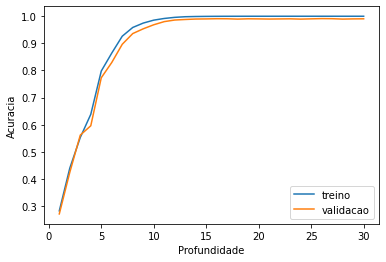

In [49]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 30
depth = range(1, 31)
for n in depth:
    # fit the model
    tree = DecisionTreeRegressor(max_depth=n)
    tree.fit(x_train, y_train)
    # record training set accuracy
    training_accuracy.append(tree.score(x_train, y_train))
    # record generalization accuracy
    test_accuracy.append(tree.score(x_test, y_test))

#plotting the training & testing accuracy for max_depth from 1 to 30
plt.plot(depth, training_accuracy, label="treino")
plt.plot(depth, test_accuracy, label="validacao")
plt.ylabel("Acuracia")  
plt.xlabel("Profundidade")
plt.legend()


# A partir desse grafico podemos observar que a profundidade maximo a partir de 10 chegamos em um problema de overfitting
# portanto é mais interessante manter a profundidade em 9 para nao ter esse problema

In [50]:
tree = DecisionTreeRegressor(max_depth = 9)

tree.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=9)

In [51]:
# Erro quadratico medio (mean_squared_error)

acc_train_tree = tree.score(x_train, y_train) * 100
acc_test_tree = tree.score(x_test, y_test) * 100

#computing root mean squared error (RMSE)
rmse_train_tree = np.sqrt(mean_squared_error(y_train, y_train_tree))
rmse_test_tree = np.sqrt(mean_squared_error(y_test, y_test_tree))

print("Decision Tree: Acuracia nos dados de treino: {:.3f}%".format(acc_train_tree))
print("Decision Tree: Accuracia nos dados de validacao: {:.3f}%".format(acc_test_tree))
print('\nDecision Tree: A raiz do Erro meio quadrado nos dados de treino:', rmse_train_tree)
print('Decision Tree: A raiz do Erro medio quadrado nos dados de validacao:', rmse_test_tree)



from sklearn.metrics import r2_score

r2score_tree = r2_score(y_test, y_test_tree) * 100

print("\nArvore de decisao R2 score: {:.5f}%".format(r2score))


from sklearn.metrics import max_error

maxError_tree = max_error(y_test, y_test_tree)

print("\nRandom Forest erro maximo: {:.3f}".format(maxError))

Decision Tree: Acuracia nos dados de treino: 97.484%
Decision Tree: Accuracia nos dados de validacao: 95.350%

Decision Tree: A raiz do Erro meio quadrado nos dados de treino: 3.256034586731305
Decision Tree: A raiz do Erro medio quadrado nos dados de validacao: 85.46523681016765

Arvore de decisao R2 score: 99.04982%

Random Forest erro maximo: 1589.000


In [52]:
storeResults("DecisionTree", acc_test=acc_test_tree, acc_train=acc_train_tree, rmse_train=rmse_train_tree, rmse_test=rmse_test_tree, r2=r2score_tree, max=maxError_tree)

### Predicao de uma amostra de tamanho 1

In [53]:
# SINGLE PREDICTION

data = {
    'country': [57],
    'year': [37],
    'gender': [1],
    'age_group': [2],
    'population': [90000007676700],
}

pred_feat = pd.DataFrame(data)

pred = tree.predict(pred_feat)

print("Tera {:.3f} suicidios aproximadamente".format(max(pred)))

Tera 7323.583 suicidios aproximadamente


## Comparacao entre os modelos

In [58]:
results = pd.DataFrame({ 'ML Model': ML_Model,    
    'Treino Acuracia': acc_train_res,
    'Teste Acuracia': acc_test_res,
    'Raiz EMQ treio': rmse_train_res,
    'Raiz EMQ validacao': rmse_test_res,
    'R2 Score': r2score_res,
    'Erro máximo': maxError_res
    })

results

,ML Model,Treino Acuracia,Teste Acuracia,Raiz EMQ treio,Raiz EMQ validacao,R2 Score,Erro máximo
0,RandomForest,94.166,92.234,46.232,86.081,99,2342
1,DecisionTree,97.484,95.350,3.256,85.465,99,1589
2,RandomForest,94.166,92.234,219.865,244.340,92,4399
